In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score 

In [156]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [157]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

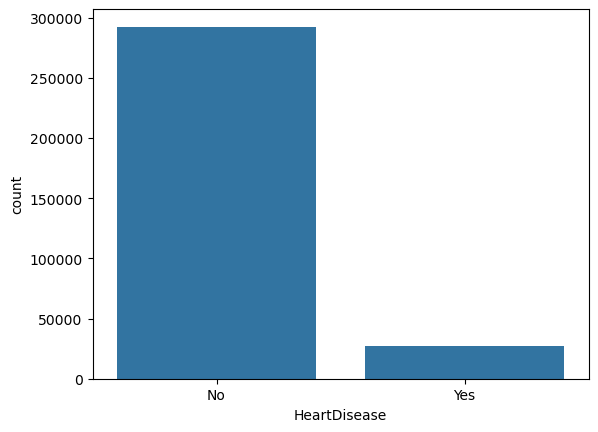

In [158]:
sns.countplot(x=df['HeartDisease'])
plt.show()

In [159]:
print("Ratio of count of class 'No' to class 'Yes':", len(df[df['HeartDisease']=='No'])/len(df[df['HeartDisease']=='Yes']))

Ratio of count of class 'No' to class 'Yes': 10.682862674898622


In [165]:
df = df[df["Race"] != 'American Indian/Alaskan Native']

In [166]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 245212,
 'Hispanic': 27446,
 'Black': 22939,
 'Other': 10928,
 'Asian': 8068}

<AxesSubplot:xlabel='Race', ylabel='count'>

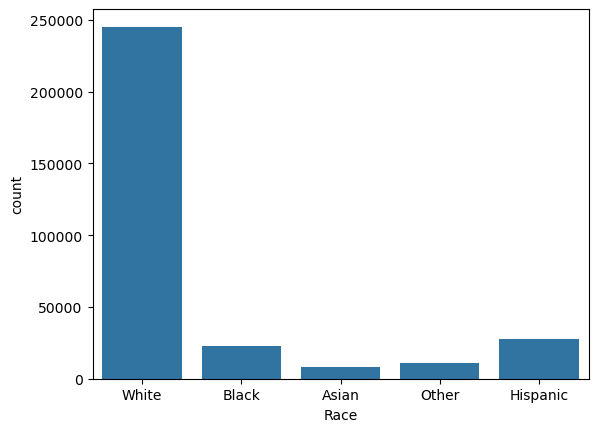

In [167]:
sns.countplot(x = df["Race"])

In [168]:
total = 0
nonwhite = 0

for race, num in counts.items():
    if race != "White":
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.220542097249462


In [169]:
num_races = len(counts.items())

target_dist_1 = np.array([1 - (percent_nonwhite)] + [percent_nonwhite / (num_races - 1) for i in range (num_races - 1)])
target_dist_1

array([0.7794579 , 0.05513552, 0.05513552, 0.05513552, 0.05513552])

In [170]:
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

In [171]:
counts.keys()

dict_keys(['White', 'Hispanic', 'Black', 'Other', 'Asian'])

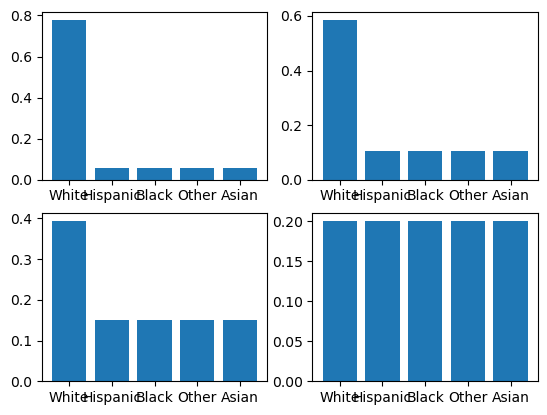

In [172]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

# Remove Duplicates

In [173]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (314593, 18)
Duplicates in dataset: 18068


In [174]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (296525, 18)
Duplicates in dataset: 0


In [175]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 227724,
 'Hispanic': 27107,
 'Black': 22810,
 'Other': 10891,
 'Asian': 7993}

In [176]:
total = 0
nonwhite = 0

for race, num in counts.items():
    if race != "White":
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.23202428125790406


In [177]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Encoding

In [179]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,4,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,4,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,4,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,4,0,1,4,8.0,0,0,0


# Standardization

In [180]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

continuous_vars=df.select_dtypes('float64').columns
cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.830518,1,0,0,-0.067872,3.193682,0,0,7,4,2,1,4,-1.426628,1,0,1
1,0,-1.251373,0,0,1,-0.437546,-0.506319,0,0,12,4,0,1,4,-0.058196,0,0,0
2,0,-0.285098,1,0,0,2.026949,3.193682,0,1,9,4,2,1,1,0.626020,1,0,0
3,0,-0.652097,0,0,0,-0.437546,-0.506319,0,0,11,4,0,0,2,-0.742412,0,0,1
4,0,-0.729523,0,0,0,3.012747,-0.506319,1,0,4,4,0,1,4,0.626020,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.156571,1,0,0,0.425027,-0.506319,1,1,8,2,2,0,1,-0.742412,1,0,0
319791,0,0.219718,1,0,0,-0.437546,-0.506319,0,1,3,2,0,1,4,-1.426628,1,0,0
319792,0,-0.647451,0,0,0,-0.437546,-0.506319,0,0,5,2,0,1,2,-0.742412,0,0,0
319793,0,0.679628,0,0,0,-0.437546,-0.506319,0,0,1,2,0,0,2,3.362883,0,0,0


In [181]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [182]:
training_data.size, testing_data.size

(4269960, 1067490)

## Train Test Split

In [183]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [184]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,2.661729,0,0,0,0.794701,0.110348,0,0,2,2,0,1,2,-0.058196,0,0,0
1,0,-1.005159,0,0,1,-0.191097,-0.506319,0,0,9,4,0,1,2,-0.058196,0,0,0
2,1,0.012217,1,0,0,-0.437546,3.193682,0,0,2,3,0,0,2,-0.742412,0,0,0
3,0,-0.433756,0,0,0,-0.437546,0.110348,0,1,7,4,0,1,4,0.626020,0,0,0
4,0,-0.015656,1,0,0,-0.437546,-0.506319,0,0,9,1,0,0,2,-1.426628,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237215,0,-1.285440,1,0,0,-0.437546,-0.506319,0,0,10,4,0,1,0,-0.058196,0,0,0
237216,0,0.097385,0,0,0,-0.437546,-0.506319,0,1,4,1,0,1,0,-0.058196,0,0,0
237217,0,1.153474,0,0,0,-0.437546,-0.506319,0,0,12,4,0,0,0,0.626020,1,0,0
237218,0,-0.015656,0,0,0,-0.437546,-0.259652,0,0,2,1,3,0,2,-0.742412,0,0,0


In [185]:
testing_data.reset_index(inplace=True, drop=True)
testing_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.171714,1,0,0,-0.437546,-0.506319,1,1,8,4,0,0,4,-0.742412,0,0,0
1,0,3.722463,0,0,0,-0.437546,-0.506319,0,1,4,4,2,0,2,-0.742412,0,0,0
2,0,-1.382997,0,0,0,-0.437546,-0.506319,0,0,6,4,0,1,4,-0.058196,0,0,0
3,0,0.696661,1,0,0,-0.437546,-0.506319,0,0,3,4,0,1,4,0.626020,1,0,0
4,1,1.359426,1,0,1,2.643072,-0.259652,1,0,8,4,0,0,1,0.626020,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59300,0,-0.012559,0,0,0,-0.437546,-0.506319,1,0,9,4,0,1,2,-0.742412,1,0,0
59301,0,0.219718,0,0,0,-0.437546,-0.506319,0,1,8,4,0,1,2,-0.742412,0,0,0
59302,0,-0.515827,1,0,0,-0.437546,-0.506319,1,1,12,4,0,0,0,0.626020,0,0,0
59303,0,1.430658,0,0,0,-0.191097,-0.506319,0,1,10,3,0,1,4,-0.742412,1,0,0


In [188]:
# class count
class_counts = training_data['Race'].value_counts()

# Separate class
classes = [training_data[training_data['Race'] == i] for i in range (6)]
class_5 = training_data[training_data['Race'] == 4]
class_1 = training_data[training_data['Race'] != 4]

print('Class 0 [Race = White]:', class_5.shape)
print('Class 1 [Race != White]:', class_1.shape)

Class 0 [Race = White]: (182116, 18)
Class 1 [Race != White]: (55104, 18)


In [36]:
class_count_0 = class_0.shape[0]
class_count_1 = class_0.shape[0]

In [190]:
counts = training_data['Race'].value_counts()
counts

Race
4    182116
2     21688
1     18212
3      8718
0      6486
Name: count, dtype: int64

In [35]:
race = {4: "White", 2: "Hispanic", 1: "Black", 3: "Other", 0: "Asian"}

In [193]:
num_races = len(counts.items())

counts = training_data['Race'].value_counts()
counts = dict(counts)
counts

total = 0
nonwhite = 0

for race, num in counts.items():
    if race != num_races - 1:
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.23229070061546245


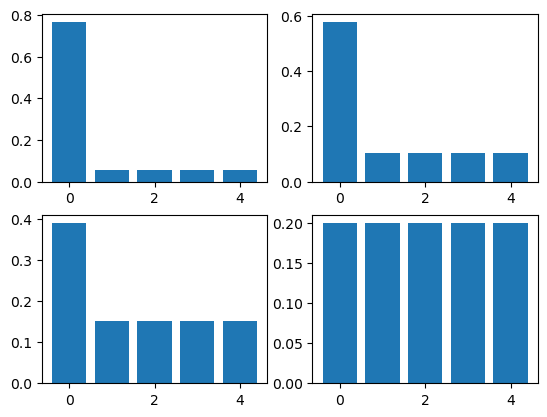

In [194]:
num_races = len(counts.items())

target_dist_1 = np.array([percent_nonwhite / (num_races - 1) for i in range (num_races - 1)] + [1 - (percent_nonwhite)])
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

### 7.1 Random Under-sampling

In [195]:
counts # 0 is the limiting factor

{4: 182116, 2: 21688, 1: 18212, 3: 8718, 0: 6486}

In [196]:
min_count_nonwhite = counts[0]
for i in range (num_races - 1):
    min_count_nonwhite = min(min_count_nonwhite, counts[i])

In [58]:
182109 / 15.0

12140.6

In [54]:
counts[5] * target_dist_1[0] / target_dist_1[5]

11852.8

In [198]:
min_count_nonwhite = min(min_count_nonwhite, float(counts[num_races - 1] * target_dist_1[0]) / target_dist_1[num_races - 1])
min_count_nonwhite = int(min_count_nonwhite)

min_count_nonwhite

6486

In [199]:
target_dists = [target_dist_1, target_dist_2, target_dist_3, target_dist_4]

In [201]:
count_dists = []
for target_dist in target_dists:
    min_count_nonwhite = counts[0]
    for i in range (num_races - 1):
        min_count_nonwhite = min(min_count_nonwhite, counts[i])
    
    min_count_nonwhite = min(min_count_nonwhite, float(counts[num_races - 1] * target_dist[0]) / target_dist[num_races - 1])
    min_count_nonwhite = int(min_count_nonwhite)

    count_dists.append([int(float(min_count_nonwhite * target_dist[i]) / target_dist[0]) for i in range (num_races)])

In [202]:
count_dists

[[6486, 6486, 6486, 6486, 85743],
 [6486, 6486, 6486, 6486, 35603],
 [6486, 6486, 6486, 6486, 16533],
 [6486, 6486, 6486, 6486, 6486]]

In [203]:
classes = [training_data[training_data['Race'] == i] for i in range (num_races)]

training_data_list = [training_data]
training_data_list += [pd.concat([classes[i].sample(count_dists[j][i]) for i in range (num_races)], axis=0) for j in range (4)]

Total counts:
Race
4    182116
2     21688
1     18212
3      8718
0      6486
Name: count, dtype: int64


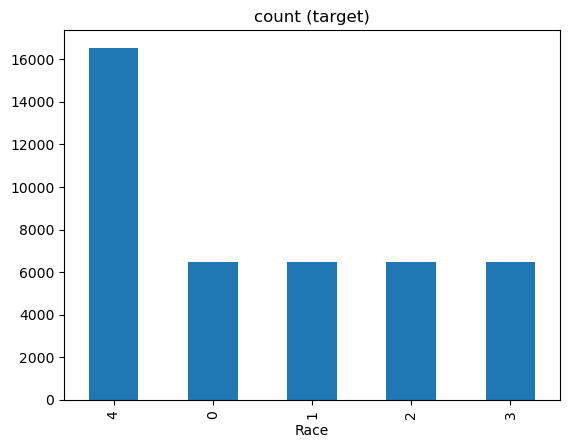

In [207]:
# plot the count after under-sampling
print("Total counts:")
print(training_data_list[0]['Race'].value_counts())
training_data_list[3]['Race'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [208]:
X_test = testing_data.drop(['HeartDisease'], axis=1)
y_test = testing_data['HeartDisease']

X_train_list = [training_data.drop(['HeartDisease'], axis=1) for training_data in training_data_list]
y_train_list = [training_data['HeartDisease'] for training_data in training_data_list]

data_desc = ['Imbalanced', 'Undersampling Level 1', 'Undersampling Level 2', 'Undersampling Level 3', 'Undersampling Level 4']

In [209]:
from sklearn.metrics import recall_score

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

241373 training examples
Epoch 1/30
6789/6789 [==============================] - 4s 560us/step - loss: 0.2491 - accuracy: 0.9101 - val_loss: 0.2459 - val_accuracy: 0.9095
Epoch 2/30
6789/6789 [==============================] - 4s 533us/step - loss: 0.2398 - accuracy: 0.9109 - val_loss: 0.2445 - val_accuracy: 0.9098
Epoch 3/30
6789/6789 [==============================] - 4s 565us/step - loss: 0.2386 - accuracy: 0.9110 - val_loss: 0.2429 - val_accuracy: 0.9093
Epoch 4/30
6789/6789 [==============================] - 4s 537us/step - loss: 0.2379 - accuracy: 0.9108 - val_loss: 0.2472 - val_accuracy: 0.9098
Epoch 5/30
6789/6789 [==============================] - 4s 557us/step - loss: 0.2377 - accuracy: 0.9110 - val_loss: 0.2423 - val_accuracy: 0.9095
Epoch 6/30
6789/6789 [==============================] - 4s 534us/step - loss: 0.2374 - accuracy: 0.9111 - val_loss: 0.2425 - va

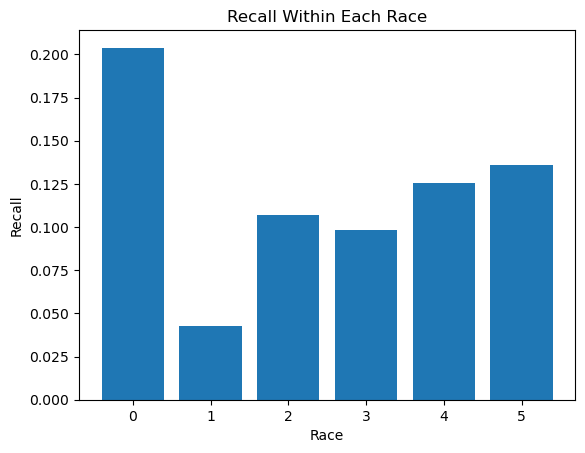

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (UNDERSAMPLING LEVEL 1):

85163 training examples
Epoch 1/30
2396/2396 [==============================] - 2s 596us/step - loss: 0.2786 - accuracy: 0.8991 - val_loss: 0.2680 - val_accuracy: 0.8979
Epoch 2/30
2396/2396 [==============================] - 1s 540us/step - loss: 0.2478 - accuracy: 0.9083 - val_loss: 0.2664 - val_accuracy: 0.8975
Epoch 3/30
2396/2396 [==============================] - 1s 548us/step - loss: 0.2457 - accuracy: 0.9089 - val_loss: 0.2642 - val_accuracy: 0.8982
Epoch 4/30
2396/2396 [==============================] - 1s 566us/step - loss: 0.2438 - accuracy: 0.9093 - val_loss: 0.2643 - val_accuracy: 0.8974
Epoch 5/30
2396/2396 [==============================] - 1s 549us/step - loss: 0.2426 - accuracy: 0.9095 - val_loss: 0.2679 - val_accuracy: 0.8969
Epoch 6/30
2396/2396 [===================

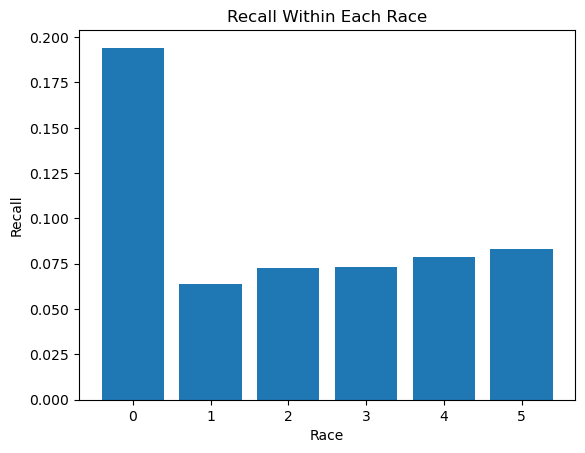

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (UNDERSAMPLING LEVEL 2):

47365 training examples
Epoch 1/30
1333/1333 [==============================] - 1s 606us/step - loss: 0.2528 - accuracy: 0.9161 - val_loss: 0.2735 - val_accuracy: 0.8987
Epoch 2/30
1333/1333 [==============================] - 1s 559us/step - loss: 0.2304 - accuracy: 0.9169 - val_loss: 0.2708 - val_accuracy: 0.8966
Epoch 3/30
1333/1333 [==============================] - 1s 582us/step - loss: 0.2272 - accuracy: 0.9168 - val_loss: 0.2698 - val_accuracy: 0.8982
Epoch 4/30
1333/1333 [==============================] - 1s 599us/step - loss: 0.2256 - accuracy: 0.9166 - val_loss: 0.2687 - val_accuracy: 0.8982
Epoch 5/30
1333/1333 [==============================] - 1s 594us/step - loss: 0.2248 - accuracy: 0.9173 - val_loss: 0.2707 - val_accuracy: 0.8978
Epoch 6/30
1333/1333 [===================

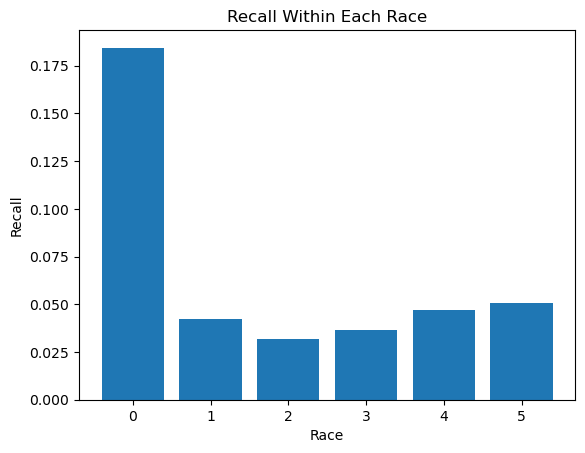

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (UNDERSAMPLING LEVEL 3):

32805 training examples
Epoch 1/30
923/923 [==============================] - 1s 646us/step - loss: 0.2741 - accuracy: 0.9137 - val_loss: 0.2803 - val_accuracy: 0.9016
Epoch 2/30
923/923 [==============================] - 1s 553us/step - loss: 0.2264 - accuracy: 0.9224 - val_loss: 0.2626 - val_accuracy: 0.9000
Epoch 3/30
923/923 [==============================] - 1s 600us/step - loss: 0.2211 - accuracy: 0.9220 - val_loss: 0.2639 - val_accuracy: 0.9006
Epoch 4/30
923/923 [==============================] - 1s 624us/step - loss: 0.2186 - accuracy: 0.9226 - val_loss: 0.2581 - val_accuracy: 0.8994
Epoch 5/30
923/923 [==============================] - 1s 611us/step - loss: 0.2170 - accuracy: 0.9223 - val_loss: 0.2573 - val_accuracy: 0.9009
Epoch 6/30
923/923 [==============================]

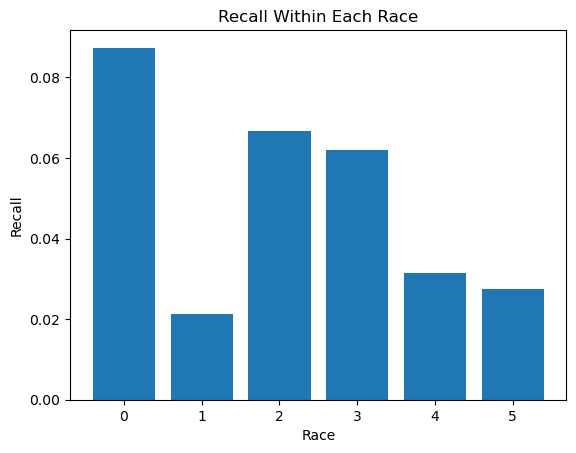

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (UNDERSAMPLING LEVEL 4):

25092 training examples
Epoch 1/30
706/706 [==============================] - 1s 703us/step - loss: 0.3573 - accuracy: 0.8714 - val_loss: 0.3149 - val_accuracy: 0.9028
Epoch 2/30
706/706 [==============================] - 0s 560us/step - loss: 0.2190 - accuracy: 0.9291 - val_loss: 0.2843 - val_accuracy: 0.9024
Epoch 3/30
706/706 [==============================] - 0s 617us/step - loss: 0.2082 - accuracy: 0.9298 - val_loss: 0.2728 - val_accuracy: 0.9020
Epoch 4/30
706/706 [==============================] - 0s 628us/step - loss: 0.2031 - accuracy: 0.9293 - val_loss: 0.2674 - val_accuracy: 0.9032
Epoch 5/30
706/706 [==============================] - 0s 565us/step - loss: 0.2007 - accuracy: 0.9295 - val_loss: 0.2753 - val_accuracy: 0.9016
Epoch 6/30
706/706 [==============================]

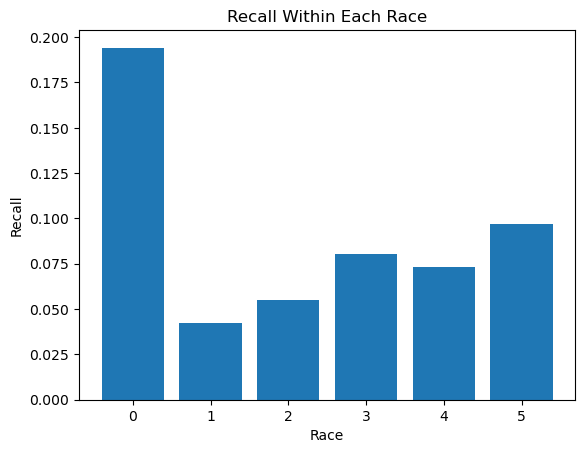

---------------------------------------------------------------------------


In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    model = Sequential()
    model.add(Dense(32, input_dim=X_train_list[i].shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_list[i], y_train_list[i], epochs=30, batch_size=32, validation_split=0.1)

    pred = model.predict(X_test).squeeze()
    pred = (pred > 0.5).astype(int)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Recall')
    plt.title('Recall Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

237220 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     53857
           1       0.53      0.09      0.15      5448

    accuracy                           0.91     59305
   macro avg       0.72      0.54      0.55     59305
weighted avg       0.88      0.91      0.88     59305



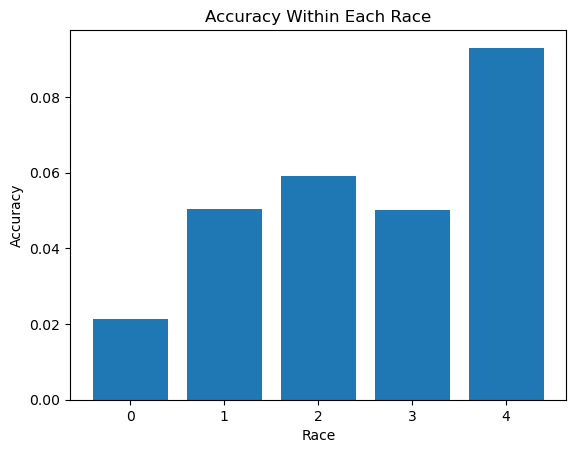

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (UNDERSAMPLING LEVEL 1):

111687 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     53857
           1       0.54      0.09      0.15      5448

    accuracy                           0.91     59305
   macro avg       0.73      0.54      0.55     59305
weighted avg       0.88      0.91      0.88     59305



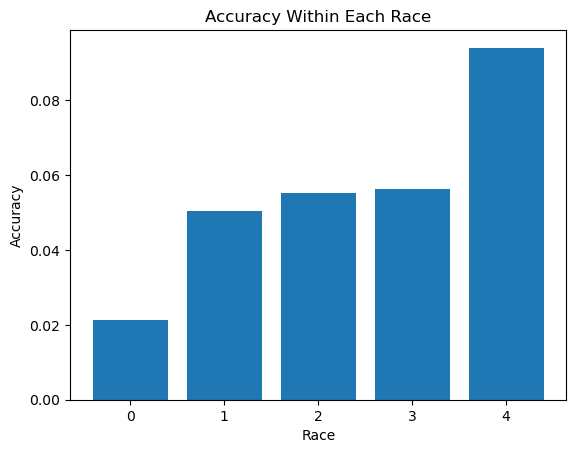

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (UNDERSAMPLING LEVEL 2):

61547 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53857
           1       0.54      0.09      0.16      5448

    accuracy                           0.91     59305
   macro avg       0.73      0.54      0.56     59305
weighted avg       0.88      0.91      0.88     59305



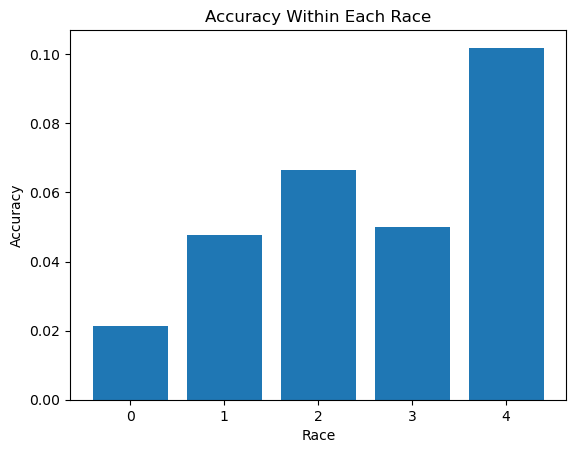

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (UNDERSAMPLING LEVEL 3):

42477 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53857
           1       0.54      0.10      0.17      5448

    accuracy                           0.91     59305
   macro avg       0.73      0.55      0.56     59305
weighted avg       0.88      0.91      0.88     59305



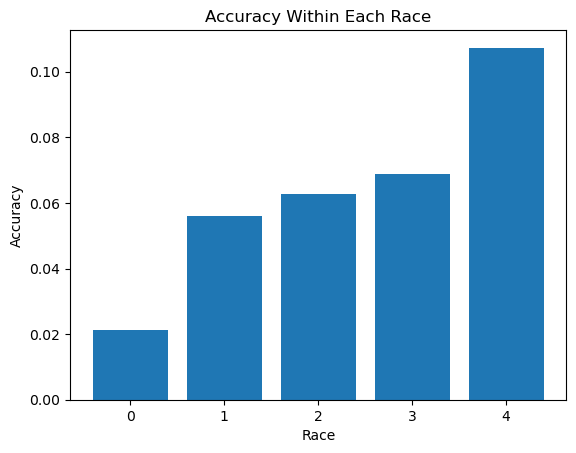

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (UNDERSAMPLING LEVEL 4):

32430 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53857
           1       0.52      0.11      0.18      5448

    accuracy                           0.91     59305
   macro avg       0.72      0.55      0.57     59305
weighted avg       0.88      0.91      0.88     59305



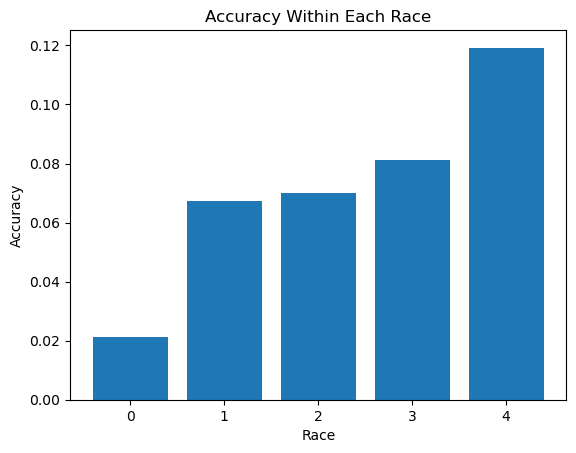

---------------------------------------------------------------------------


In [210]:
for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = clf_LR.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

237220 training examples
Model accuracy score: 0.8987


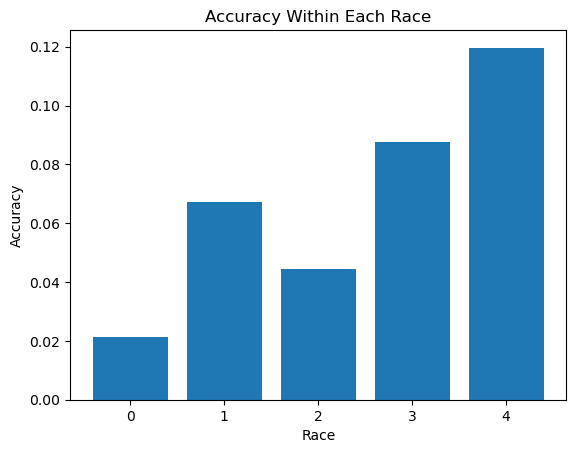

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (UNDERSAMPLING LEVEL 1):

111687 training examples
Model accuracy score: 0.9017


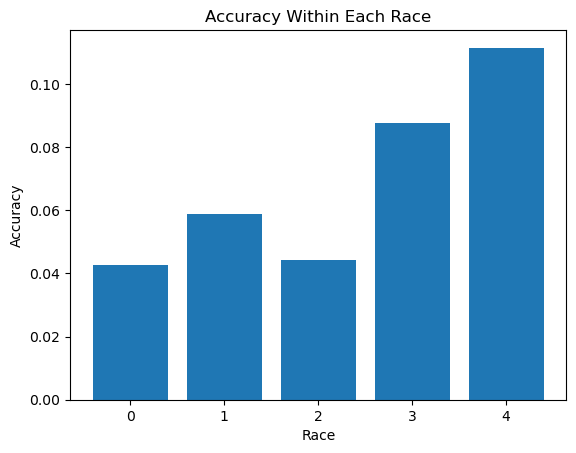

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (UNDERSAMPLING LEVEL 2):

61547 training examples
Model accuracy score: 0.9039


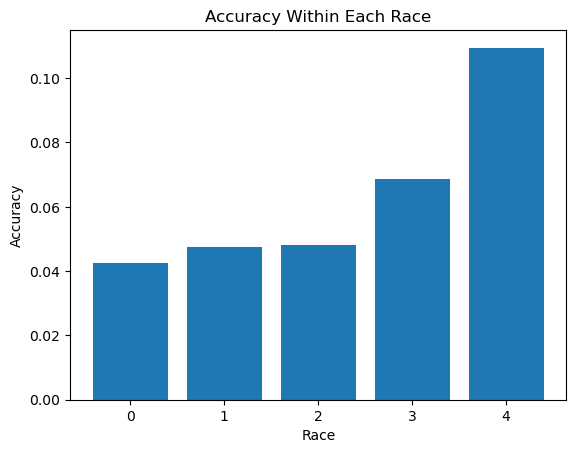

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (UNDERSAMPLING LEVEL 3):

42477 training examples
Model accuracy score: 0.9050


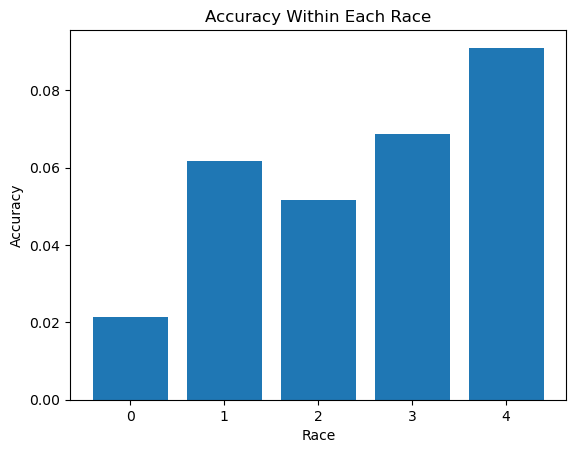

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (UNDERSAMPLING LEVEL 4):

32430 training examples
Model accuracy score: 0.9059


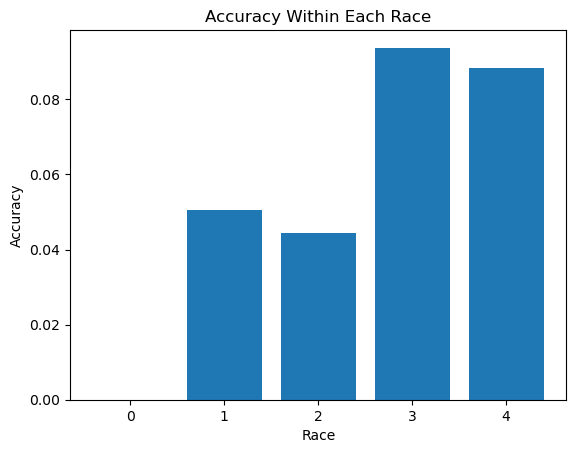

---------------------------------------------------------------------------


In [211]:
from sklearn.ensemble import  RandomForestClassifier

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_RF= RandomForestClassifier().fit(X_train_list[i], y_train_list[i])
        
    pred = clf_RF.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    
    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
Model with training data-0 (Imbalanced):

Model accuracy score: 0.9002


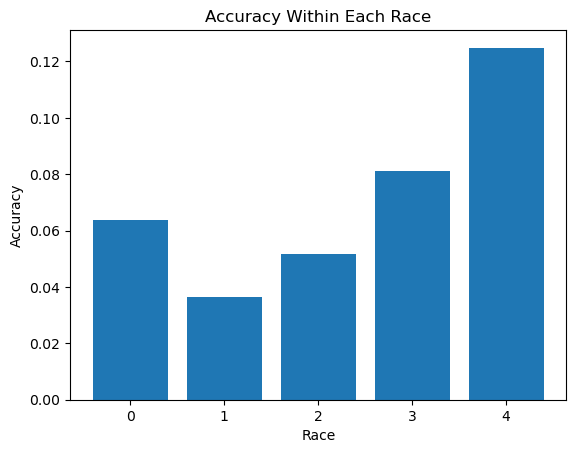

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Undersampling Level 1):

Model accuracy score: 0.9004


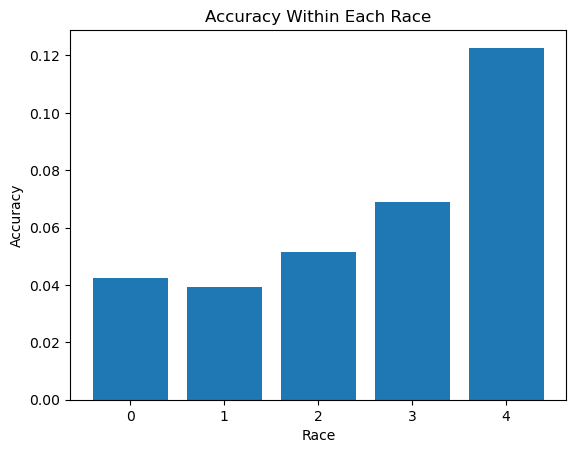

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-2 (Undersampling Level 2):

Model accuracy score: 0.8998


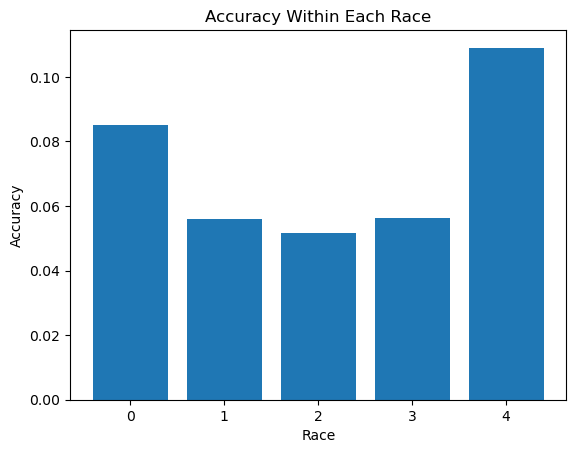

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-3 (Undersampling Level 3):

Model accuracy score: 0.9000


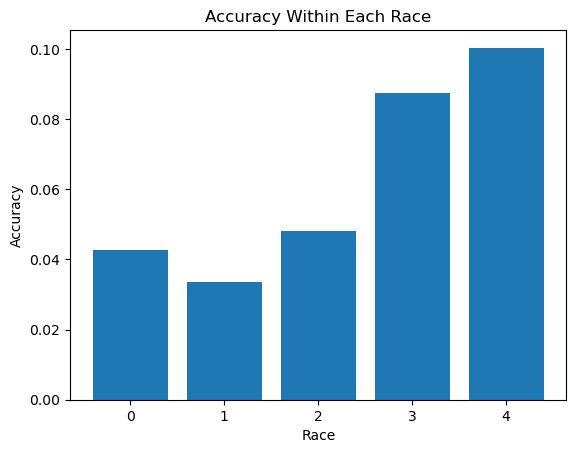

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-4 (Undersampling Level 4):

Model accuracy score: 0.8996


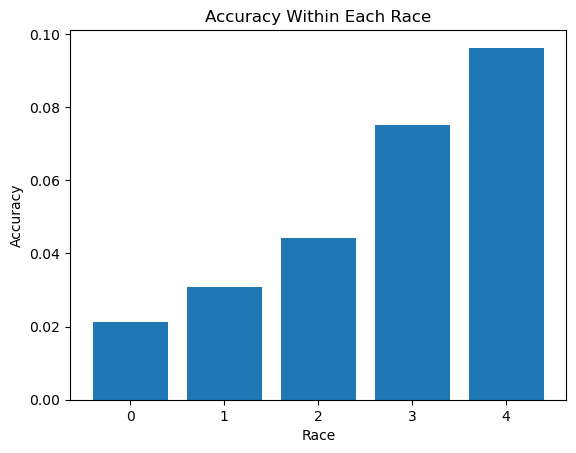

---------------------------------------------------------------------------


In [213]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")
    
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    clf_knn.fit(X_train_list[i], y_train_list[i])
    pred = clf_knn.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    
    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

## SMOTE

In [215]:
x = training_data.drop(['Race'], axis=1)
y = training_data['Race']

In [148]:
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-0.869181,1,1,0,-0.193142,-0.260999,0,1,4,5,0,1,2,0.623971,0,0,0
1,0,0.372292,0,0,0,0.052539,-0.507054,0,1,0,4,0,1,4,-0.739244,1,0,0
2,0,1.262813,1,0,0,-0.315982,-0.260999,0,1,4,3,0,0,2,-0.739244,0,0,0
3,0,0.186767,0,0,0,-0.438823,-0.507054,0,0,9,5,0,0,4,1.305579,0,0,0
4,1,-0.294053,0,0,0,-0.438823,0.354137,0,1,5,5,0,1,4,-0.739244,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241368,0,1.657054,0,0,0,-0.438823,-0.507054,0,0,8,5,2,1,4,0.623971,0,0,1
241369,0,-0.029679,0,0,0,-0.315982,0.108083,0,0,3,5,0,1,0,0.623971,0,0,0
241370,0,1.080380,0,0,1,-0.438823,-0.507054,1,0,11,5,2,0,2,-0.739244,0,0,0
241371,1,-0.182738,1,0,0,-0.438823,-0.507054,0,1,12,5,0,1,0,0.623971,0,1,1


In [216]:
race_ind= list(training_data.columns).index("Race")

In [217]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

training_data_smote = pd.concat([x_smote.iloc[:, :race_ind], y_smote, x_smote.iloc[:, race_ind: ]], axis=1)

In [218]:
smote_counts = training_data_smote['Race'].value_counts()

In [219]:
smote_counts

Race
2    182116
4    182116
3    182116
1    182116
0    182116
Name: count, dtype: int64

In [220]:
X_train_list = [training_data_smote.drop(['HeartDisease'], axis=1)]
y_train_list = [training_data_smote['HeartDisease']]

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

910580 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     53857
           1       0.34      0.12      0.18      5448

    accuracy                           0.90     59305
   macro avg       0.63      0.55      0.56     59305
weighted avg       0.86      0.90      0.88     59305



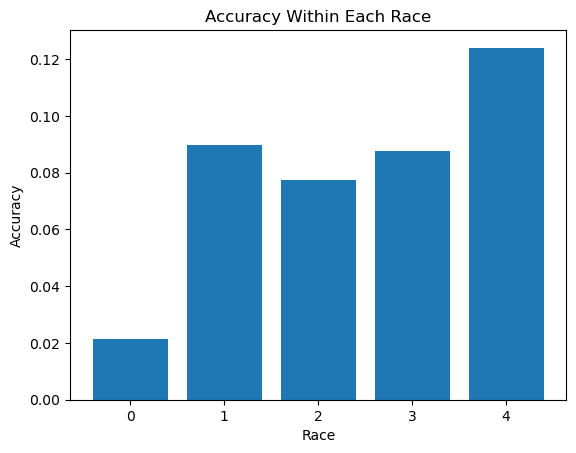

---------------------------------------------------------------------------


In [225]:
for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    clf_knn.fit(X_train_list[i], y_train_list[i])
    pred = clf_knn.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

In [227]:
count_dists

[[6486, 6486, 6486, 6486, 85743],
 [6486, 6486, 6486, 6486, 35603],
 [6486, 6486, 6486, 6486, 16533],
 [6486, 6486, 6486, 6486, 6486]]

In [ ]:
training_data.shape[0]

In [228]:
decreased_white = training_data[training_data["Race"] == 4].sample(count_dists[0][0] * 2)
training_data_1 = pd.concat([training_data[training_data["Race"] < 2], decreased_white])
training_data_1 = training_data_1.sample(frac = 1)

x1 = training_data_1.drop(['Race'], axis=1)
y1 = training_data_1['Race']



decreased_white = training_data[training_data["Race"] == 4].sample(count_dists[0][0] * 4)
training_data_2 = pd.concat([training_data[training_data["Race"] < 2], decreased_white])
training_data_2 = training_data_2.sample(frac = 1)

x2 = training_data_2.drop(['Race'], axis=1)
y2 = training_data_2['Race']



decreased_white = training_data[training_data["Race"] == 4].sample(count_dists[0][0] * 7)
training_data_3 = pd.concat([training_data[training_data["Race"] < 2], decreased_white])
training_data_3 = training_data_3.sample(frac = 1)

x3 = training_data_3.drop(['Race'], axis=1)
y3 = training_data_3['Race']



decreased_white = training_data[training_data["Race"] == 4]
training_data_4 = pd.concat([training_data[training_data["Race"] < 2], decreased_white])
training_data_4 = training_data_4.sample(frac = 1)

x4 = training_data_4.drop(['Race'], axis=1)
y4 = training_data_4['Race']

x = [x1, x2, x3, x4]
y = [y1, y2, y3, y4]

In [234]:
len(smote.fit_resample(x1, y1))

2

In [235]:
smote = SMOTE()

x_y_smote = [smote.fit_resample(x_data, y_data) for x_data, y_data in zip(x, y)]

training_data_smote = [pd.concat([x_smote.iloc[:, :race_ind], y_smote, x_smote.iloc[:, race_ind: ]], axis=1) for x_smote, y_smote in x_y_smote]

In [242]:
X_train_list = [training_data.drop(['HeartDisease'], axis=1) for training_data in training_data_smote]
y_train_list = [training_data['HeartDisease'] for training_data in training_data_smote]

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

54636 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     53857
           1       0.31      0.09      0.14      5448

    accuracy                           0.90     59305
   macro avg       0.61      0.54      0.54     59305
weighted avg       0.86      0.90      0.87     59305



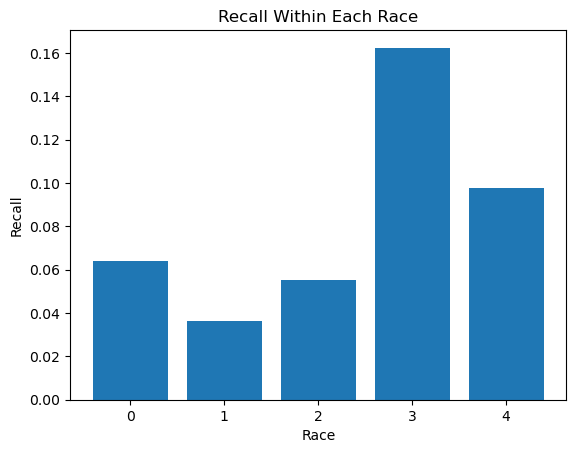

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (UNDERSAMPLING LEVEL 1):

77832 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     53857
           1       0.33      0.09      0.14      5448

    accuracy                           0.90     59305
   macro avg       0.62      0.54      0.54     59305
weighted avg       0.86      0.90      0.87     59305



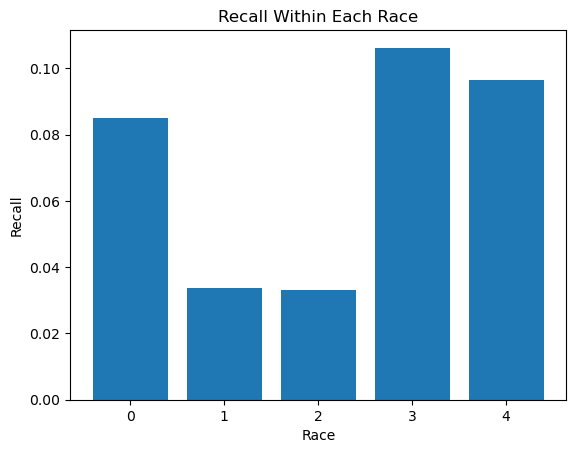

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (UNDERSAMPLING LEVEL 2):

136206 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     53857
           1       0.35      0.11      0.17      5448

    accuracy                           0.90     59305
   macro avg       0.63      0.54      0.56     59305
weighted avg       0.86      0.90      0.87     59305



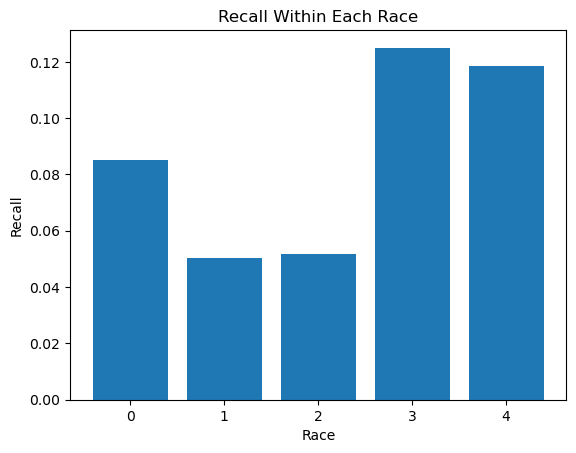

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (UNDERSAMPLING LEVEL 3):

546348 training examples
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     53857
           1       0.34      0.12      0.17      5448

    accuracy                           0.90     59305
   macro avg       0.63      0.55      0.56     59305
weighted avg       0.86      0.90      0.87     59305



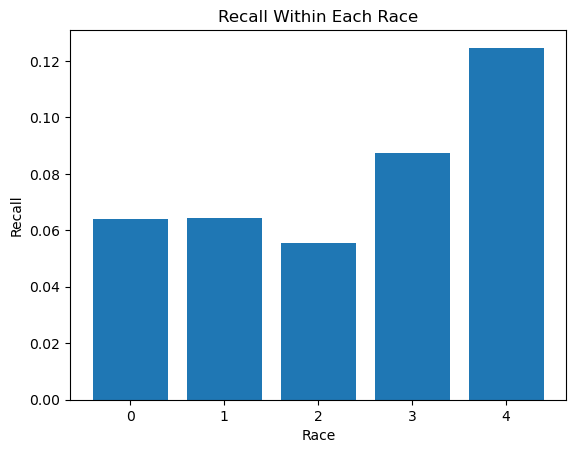

---------------------------------------------------------------------------


In [245]:
for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    clf_knn.fit(X_train_list[i], y_train_list[i])
    pred = clf_knn.predict(X_test)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Recall')
    plt.title('Recall Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

910580 training examples
Epoch 1/30
25611/25611 [==============================] - 14s 478us/step - loss: 0.1263 - accuracy: 0.9595 - val_loss: 0.1022 - val_accuracy: 0.9691
Epoch 2/30
25611/25611 [==============================] - 12s 483us/step - loss: 0.1218 - accuracy: 0.9600 - val_loss: 0.1068 - val_accuracy: 0.9691
Epoch 3/30
25611/25611 [==============================] - 12s 467us/step - loss: 0.1210 - accuracy: 0.9599 - val_loss: 0.0998 - val_accuracy: 0.9694
Epoch 4/30
25611/25611 [==============================] - 12s 476us/step - loss: 0.1206 - accuracy: 0.9600 - val_loss: 0.1013 - val_accuracy: 0.9695
Epoch 5/30
25611/25611 [==============================] - 12s 470us/step - loss: 0.1203 - accuracy: 0.9600 - val_loss: 0.1086 - val_accuracy: 0.9693
Epoch 6/30
25611/25611 [==============================] - 12s 454us/step - loss: 0.1200 - accuracy: 0.9601 - val

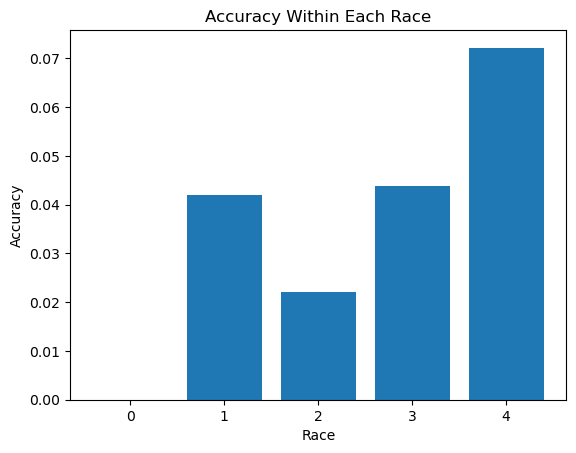

---------------------------------------------------------------------------


In [221]:
for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model
    model = Sequential()
    model.add(Dense(32, input_dim=X_train_list[i].shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_list[i], y_train_list[i], epochs=30, batch_size=32, validation_split=0.1)

    pred = model.predict(X_test).squeeze()
    pred = (pred > 0.5).astype(int)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")

In [121]:
from imblearn.over_sampling import SMOTE

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

training_data_4 = pd.concat([y_smote, x_smote], axis=1)

NameError: name 'x' is not defined